1518


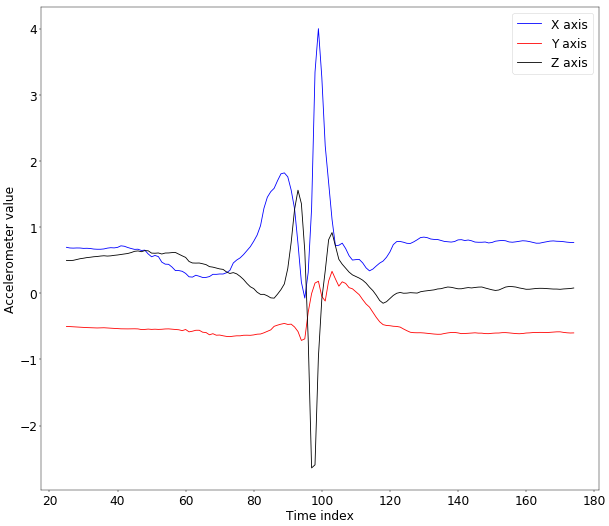

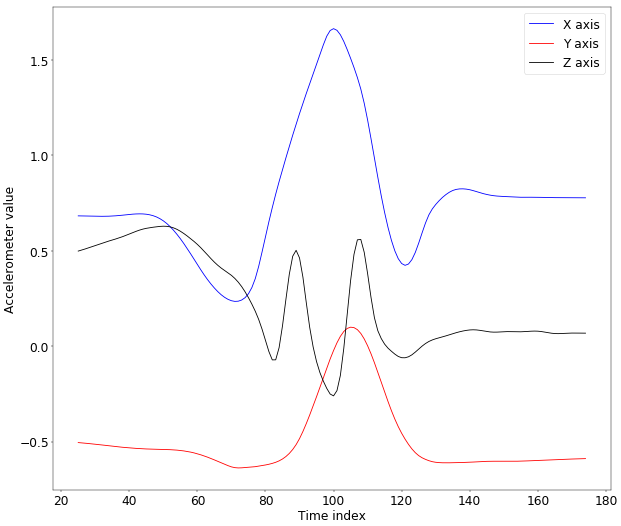

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

col_names = ['timestamp', 'X', 'Y', 'Z']
acc_data_reference = pd.read_csv('./reference-fd-bw/acc.csv', names=col_names)
# print(datetime.fromtimestamp((acc_data_forward['timestamp'][0]/1000.)))

TMP_START = 25
TMP_END = 175

import matplotlib
font = {
    # 'weight': 'bold',
    'size': 22
}
matplotlib.rc('font', **font)
matplotlib.rcParams.update({'font.size': 22})
time = list(acc_data_reference['timestamp'][TMP_START:TMP_END])
print(time[-1] - time[0])
xaxis = list(range(len(acc_data_reference)))[TMP_START:TMP_END]
x_reference = acc_data_reference['X']
# x_alt = savgol_filter(list(x_reference), 31, 2)
y_reference = acc_data_reference['Y']
z_reference = acc_data_reference['Z']
fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, (x_reference[TMP_START:TMP_END]), color="blue", label="X axis")
plt.plot(xaxis, (y_reference[TMP_START:TMP_END]), color="red", label="Y axis")
plt.plot(xaxis, (z_reference[TMP_START:TMP_END]), color="black", label="Z axis")
plt.xlabel('Time index')
plt.ylabel('Accelerometer value')
plt.legend()
plt.show()

# [TMP_START:TMP_END]

# reference data filtration
x_reference = savgol_filter(list(x_reference), 21, 2)
x_reference = savgol_filter(list(x_reference), 31, 2)
x_reference = x_reference[20:170]
y_reference = savgol_filter(list(y_reference), 21, 2)
y_reference = savgol_filter(list(y_reference), 31, 2)
# z_reference = savgol_filter(list(z_reference), 21, 2)
z_reference = savgol_filter(list(z_reference), 11, 2)
z_reference = savgol_filter(list(z_reference), 21, 2)


fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, (x_reference), color="blue", label="X axis")
plt.plot(xaxis, (y_reference[TMP_START:TMP_END]), color="red", label="Y axis")
plt.plot(xaxis, (z_reference[TMP_START:TMP_END]), color="black", label="Z axis")
plt.xlabel('Time index')
plt.ylabel('Accelerometer value')
plt.legend()
plt.show()



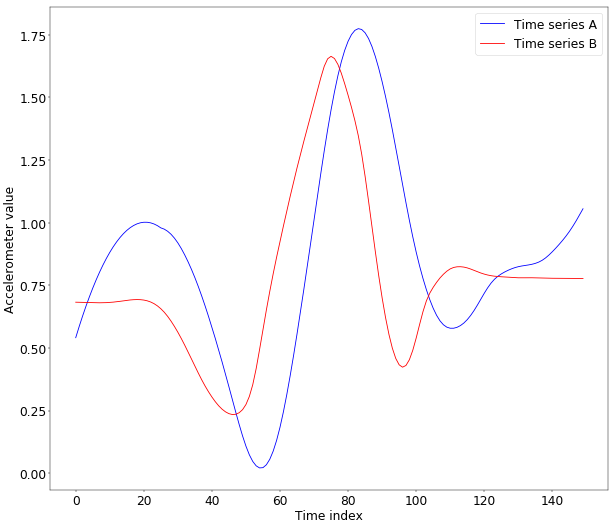

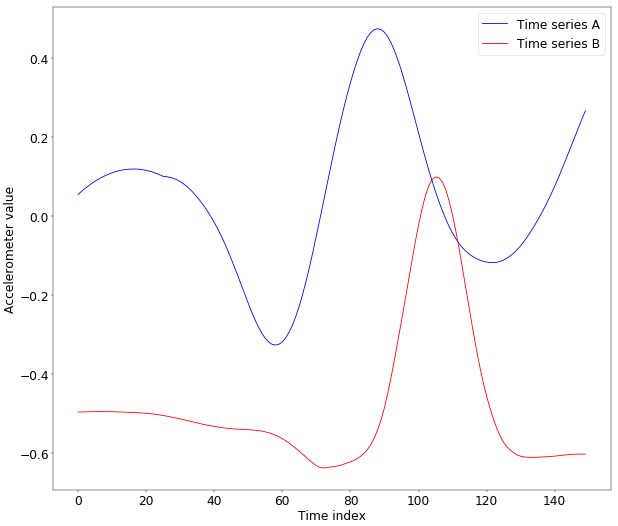

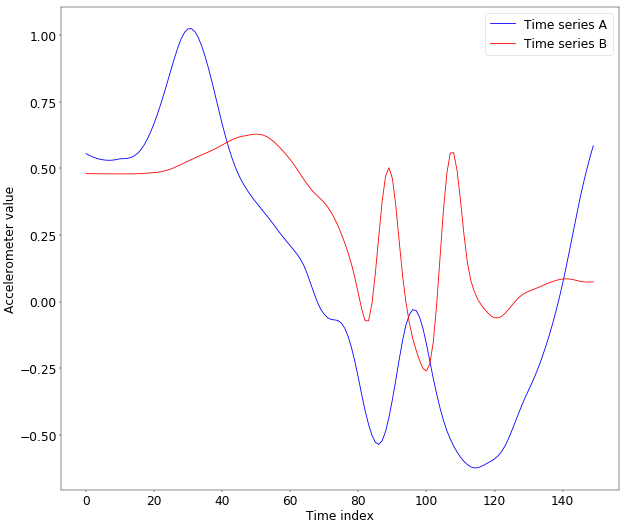

In [2]:

TMP_START = 0
TMP_END = 150

acc_data_forward = pd.read_csv('./amg-forward/acc.csv', names=col_names)
xaxis = list(range(len(acc_data_forward)))[TMP_START:TMP_END]

x_normal = acc_data_forward['X']
y_normal = acc_data_forward['Y']
z_normal = acc_data_forward['Z']


# forward data normalization
x_normal = savgol_filter(list(x_normal), 21, 2)
x_normal = savgol_filter(list(x_normal), 51, 2)
y_normal = savgol_filter(list(y_normal), 31, 2)
y_normal = savgol_filter(list(y_normal), 51, 2)
z_normal = savgol_filter(list(z_normal), 11, 2)
z_normal = savgol_filter(list(z_normal), 21, 2)


fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, (x_normal[TMP_START:TMP_END]), color="blue", label="Time series A")
plt.plot(xaxis, (x_reference[TMP_START:TMP_END]), color="red", label="Time series B")
plt.xlabel('Time index')
plt.ylabel('Accelerometer value')
plt.legend()
plt.show()
fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, (y_normal[TMP_START:TMP_END]), color="blue", label="Time series A")
plt.plot(xaxis, (y_reference[TMP_START:TMP_END]), color="red", label="Time series B")
# plt.plot(xaxis, np.rad2deg(z_normal), color="black", label="zaxis")
plt.xlabel('Time index')
plt.ylabel('Accelerometer value')
plt.legend()
plt.show()
fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, (z_normal[TMP_START:TMP_END]), color="blue", label="Time series A")
plt.plot(xaxis, (z_reference[TMP_START:TMP_END]), color="red", label="Time series B")
plt.xlabel('Time index')
plt.ylabel('Accelerometer value')
plt.legend()
plt.show()


In [4]:
%pylab inline
from dtw import dtw

# DTW for X acc
k = x_normal[TMP_START:TMP_END]
n = x_reference[TMP_START:TMP_END]
dist, cost, acc, path = dtw(k, n, dist=lambda k, n: norm(k - n))
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
print(mean(acc), mean(cost))


Populating the interactive namespace from numpy and matplotlib


23.5405896661 0.41489393691


49.8900421432 0.536680386149


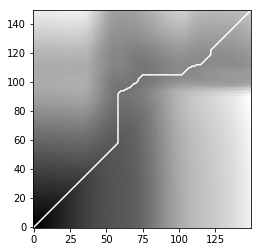

In [ ]:
# DTW for Y acc
k = y_normal[TMP_START:TMP_END]
n = y_reference[TMP_START:TMP_END]
dist, cost, acc, path = dtw(k, n, dist=lambda k, n: norm(k - n))
print(mean(acc), mean(cost))
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

24.191473892 0.48158829036


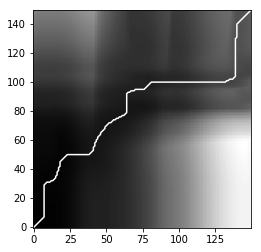

In [7]:
# DTW for Z acc
k = z_normal[TMP_START:TMP_END]
n = z_reference[TMP_START:TMP_END]
dist, cost, acc, path = dtw(k, n, dist=lambda k, n: norm(k - n))
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
# print(cost)
print(mean(acc), mean(cost))